# Python and Jupyter notebooks: part 02

Last revised: 31-Jan-2019 by Dick Furnstahl [furnstahl.1@osu.edu]

In this notebook we continue the tour of Python and Jupyter notebooks started in `5300_Jupyter_Python_intro_01.ipynb`.

## Iterating through a list of parameters to draw multiple lines on a plot

Suppose we have a function of $x$ that also depends on a parameter (call it $r$).  We want to plot the function vs. $x$ for multiple values of $r$, either on the same plot or on separate plots.  We can do this with a lot of cutting-and-pasting, but how can we do it based on a list of $r$ values, which we can easily modify?

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sine_map(r, x):
    """Sine map function: f_r(x) = r sin(pi x)
    """
    return r * np.sin(np.pi * x) 

Suppose the $r$ values initially of interest are 0.3, 0.5, 0.8, and 0.9.  First the multiple copy approach:

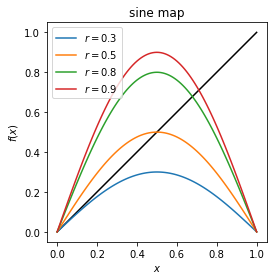

In [3]:
x_pts = np.linspace(0,1, num=101, endpoint=True)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect(1)

ax.plot(x_pts, x_pts, color='black')  # black y=x line

ax.plot(x_pts, sine_map(0.3, x_pts), label='$r = 0.3$')
ax.plot(x_pts, sine_map(0.5, x_pts), label='$r = 0.5$')
ax.plot(x_pts, sine_map(0.8, x_pts), label='$r = 0.8$')
ax.plot(x_pts, sine_map(0.9, x_pts), label='$r = 0.9$')

ax.legend()
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$f(x)$')
ax.set_title('sine map')

fig.tight_layout()


This certainly works, but making changes is awkward and prone to error because we have to find where to change (or add another) $r$ but we might not remember to change it correctly everywhere.

With minor changes we have a much better implementation (try modifying the list of $r$ values):

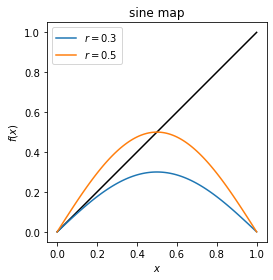

In [9]:
r_list = [0.3, 0.5]    # this could also be a numpy array

x_pts = np.linspace(0,1, num=101, endpoint=True)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect(1)

ax.plot(x_pts, x_pts, color='black')  # black y=x line

# Step through the list.  r is a dummy variable.
#  Note the use of an f-string and LaTeX by putting rf in front of the label.
for r in r_list:
    ax.plot(x_pts, sine_map(r, x_pts), label=rf'$r = {r:.1f}$')

ax.legend()
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$f(x)$')
ax.set_title('sine map')

fig.tight_layout()


Now suppose we want each the different $r$ values to be plotted on separate graphs?  We could make multiple  copies of the single plot.  Instead, lets make a function to do any single plot and call it for each $r$ in the list.

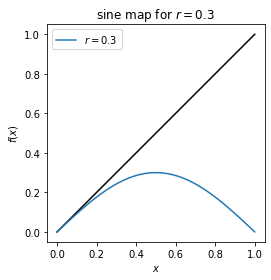

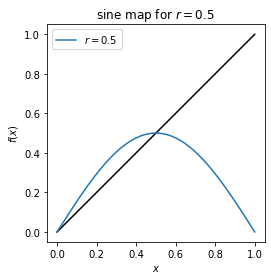

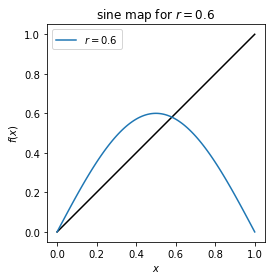

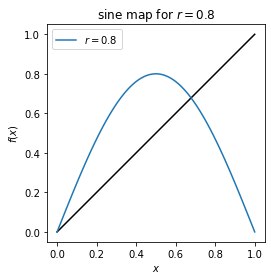

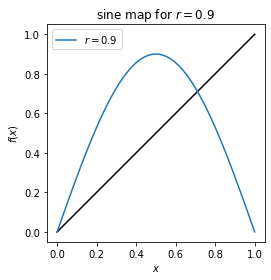

In [11]:
r_list = [0.3, 0.5, 0.6, 0.8, 0.9]    # this could also be a numpy array

def plot_sine_map(r):
    x_pts = np.linspace(0,1, num=101, endpoint=True)

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.set_aspect(1)

    ax.plot(x_pts, x_pts, color='black')  # black y=x line

#  Note the use of an f-string and LaTeX by putting rf in front of the label.
    ax.plot(x_pts, sine_map(r, x_pts), label=rf'$r = {r:.1f}$')

    ax.legend()
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$f(x)$')
    ax.set_title(rf'sine map for $r = {r:.1f}$')
    
    fig.tight_layout()

    
# Step through the list.  r is a dummy variable.
for r in r_list:
    plot_sine_map(r)


What if instead of distinct plots we wanted subplots of the same figure?  Then create the figure and subplot axes outside of the function and have the function return the modified axis object.

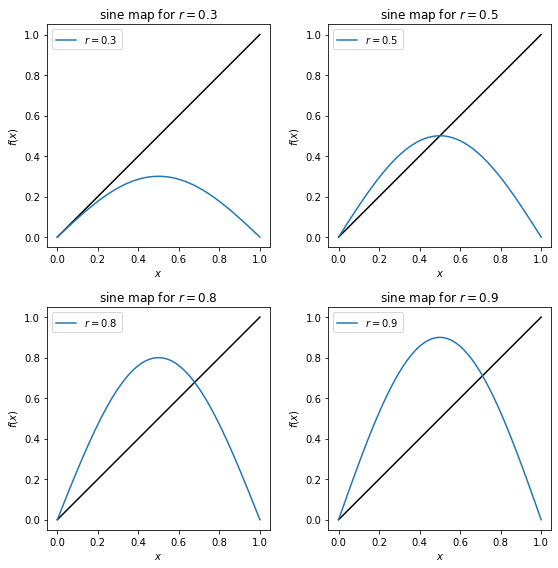

In [6]:
r_list = [0.3, 0.5, 0.8, 0.9]    # this could also be a numpy array

def plot_sine_map(r, ax_passed):
    x_pts = np.linspace(0,1, num=101, endpoint=True)

    ax_passed.set_aspect(1)

    ax_passed.plot(x_pts, x_pts, color='black')  # black y=x line

#  Note the use of an f-string and LaTeX by putting rf in front of the label.
    ax_passed.plot(x_pts, sine_map(r, x_pts), label=rf'$r = {r:.1f}$')

    ax_passed.legend()
    ax_passed.set_xlabel(r'$x$')
    ax_passed.set_ylabel(r'$f(x)$')
    ax_passed.set_title(rf'sine map for $r = {r:.1f}$')
    
    return ax_passed

fig = plt.figure(figsize=(8, 8))
  
# Step through the list.  r is a dummy variable.
rows = 2
cols = 2
for index, r in enumerate(r_list):
    ax = fig.add_subplot(rows, cols, index+1)
    ax = plot_sine_map(r, ax)

fig.tight_layout()
    